Imports

In [177]:
import re
import string
from nltk.corpus import stopwords
from stemming.porter2 import stem
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from math import log2

Load & prepare words

In [178]:
with open("witcher.txt", encoding="UTF-8") as file:
    text = file.read()

chapters = re.split("CHAPTER [A-Z]+\s+", text)
chapters = chapters[1:]

stop_words = stopwords.words("english")
words = [[] for _ in chapters]
for i in range(len(chapters)):
    words[i] = [word.lower() for word in chapters[i].split()]
    words[i] = [word for word in words[i] if word not in stop_words]
    words[i] = [word.translate(str.maketrans("", "", string.punctuation)) for word in words[i]]
    words[i] = [word for word in words[i] if word not in stop_words and len(word) > 1]
    # words[i] = [stem(word) for word in words[i]]

Create word pairs

In [179]:
pairs = [[] for _ in chapters]
count_dicts = [{} for _ in chapters]
for i in range(len(chapters)):
    for word in words[i]:
        if word in count_dicts[i]:
            count_dicts[i][word] += 1
        else:
            count_dicts[i][word] = 1
    pairs[i] = [(key, value) for (key, value) in count_dicts[i].items()]
    occurrences = lambda pair: pair[1]
    pairs[i].sort(key=occurrences, reverse=True)

TF-IDF

In [180]:
tfidf_pairs = [[] for _ in chapters]
num_of_docs = len(chapters)
for i in range(num_of_docs):
    for word, count in pairs[i]:
        num_of_docs_with_word = sum([1 for j in range(num_of_docs) if word in count_dicts[j]])
        tf_val = count
        idf_val = log2(num_of_docs / num_of_docs_with_word)
        tfidf_pairs[i].append((word, tf_val * idf_val))

    occurrences = lambda pair: pair[1]
    tfidf_pairs[i].sort(key=occurrences, reverse=True)

Word Clouds

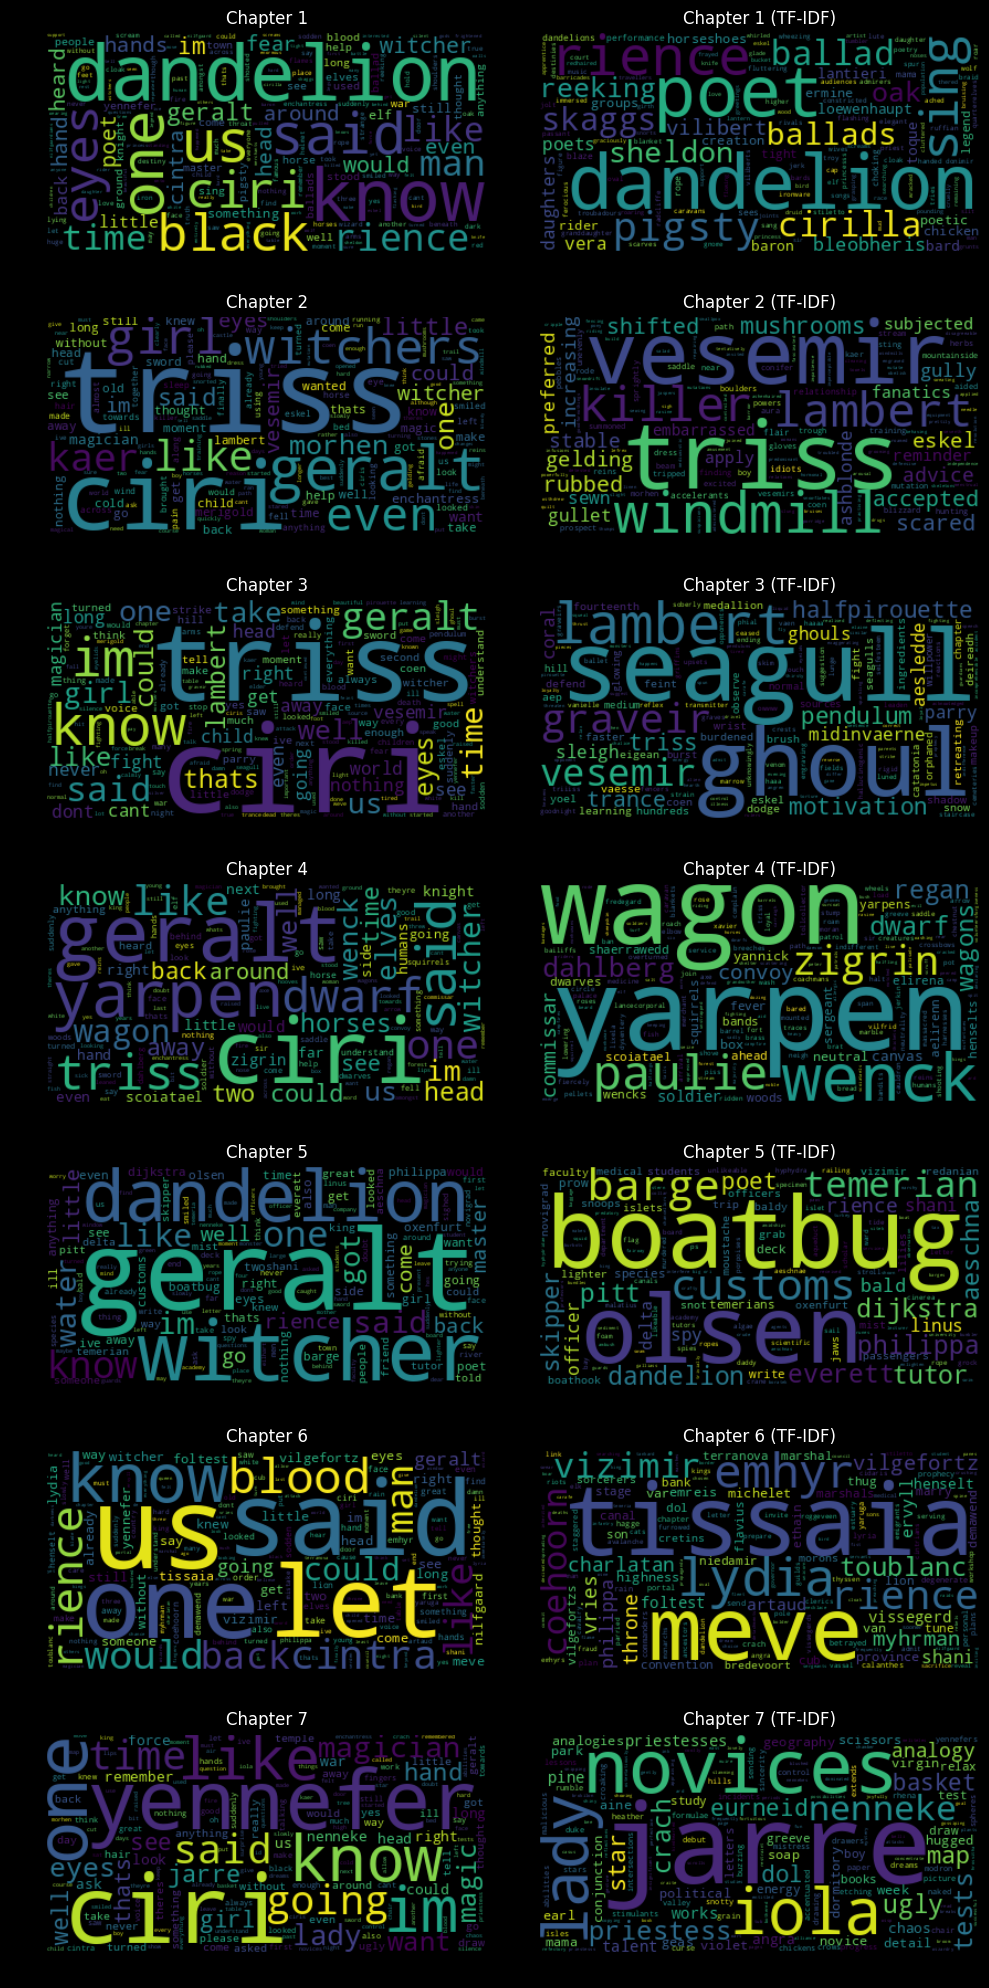

In [182]:
fig, axs = plt.subplots(7, 2, figsize=(10, 20))
fig.patch.set_facecolor('black')
for i, ax in enumerate(axs.flatten()):
    if i % 2 == 0:
        wordcloud = WordCloud().generate_from_frequencies(dict(pairs[i // 2]))
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f"Chapter {i // 2 + 1}", color='white')
    else:
        wordcloud = WordCloud().generate_from_frequencies(dict(tfidf_pairs[i // 2]))
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f"Chapter {i // 2 + 1} (TF-IDF)", color='white')
    
plt.tight_layout()
plt.savefig('img/cloud_chapters.png')
plt.show()

Chapters matching word

In [ ]:
def match_chapters(word):
    num_of_docs_with_word = sum([1 for j in range(num_of_docs) if word in count_dicts[j]])
    idf_val = log2(num_of_docs / (1 + num_of_docs_with_word))
    tf_values = [freq_dict[i] ]
    